In [9]:
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import glob # Read images with consistent filenames
import pickle

# Define chessboad corners
nx = 9 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# Define chessboard corner locations in objectpoints
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Initialize arrays to store captured corner locations
objpoints = []
imgpoints = []

# Read test images

for i in range(20):

    # Read particular image from glob returned variable
    img = mpimg.imread('camera_cal/calibration' + str(i+1) + '.jpg')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret==True: # Append found corners
        objpoints.append(objp)
        imgpoints.append(corners)


ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print(mtx,'\n')
print(dist)

# Create pickle file with mtx and dist values for future use
camera_cal = {}
camera_cal['mtx'] = mtx
camera_cal['dist'] = dist
pickle.dump(camera_cal, open( "camera_cal.p", "wb" ))


[[  1.15662906e+03   0.00000000e+00   6.69041438e+02]
 [  0.00000000e+00   1.15169194e+03   3.88137239e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]] 

[[-0.23157149 -0.12000539 -0.00118338  0.00023305  0.15641574]]


In [10]:
def undistort_img(img):
    with open("camera_cal.p", mode='rb') as camera_cal:
        camera_cal = pickle.load(camera_cal)

        mtx = camera_cal["mtx"]
        dist = camera_cal["dist"]

        undist_img = cv2.undistort(img, mtx, dist, None, mtx)
        return undist_img

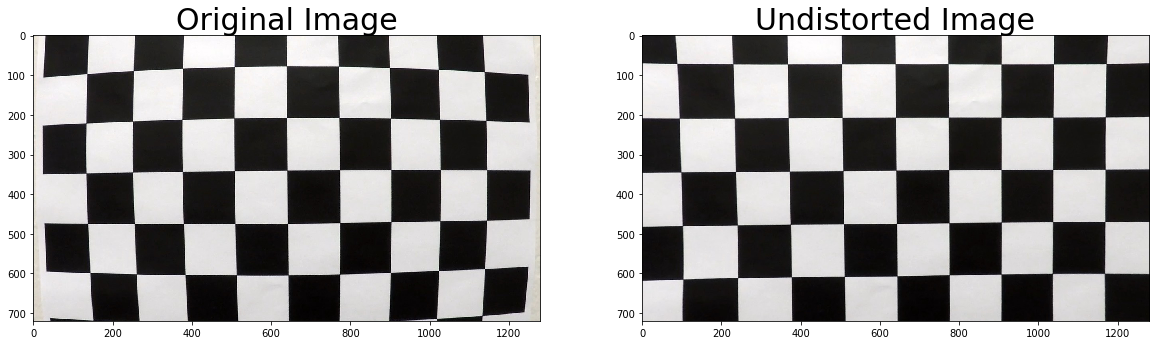

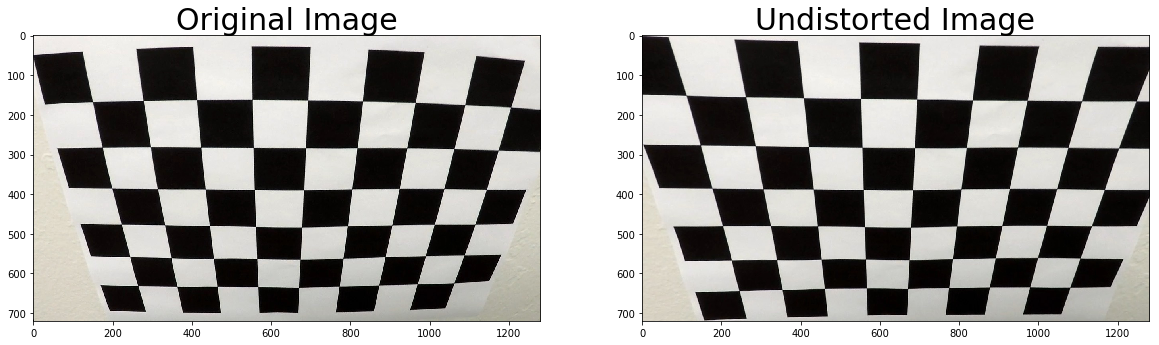

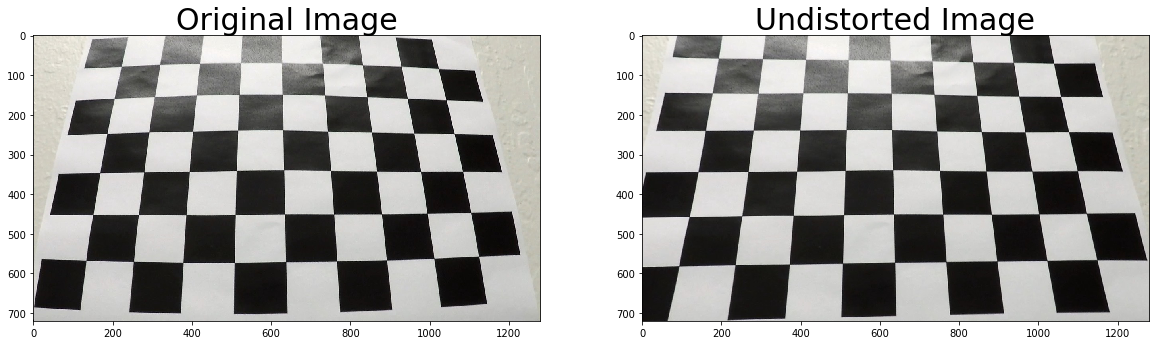

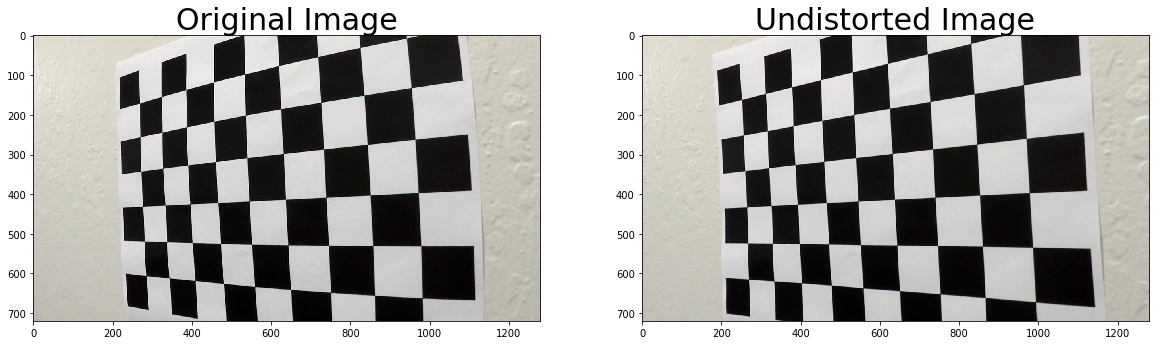

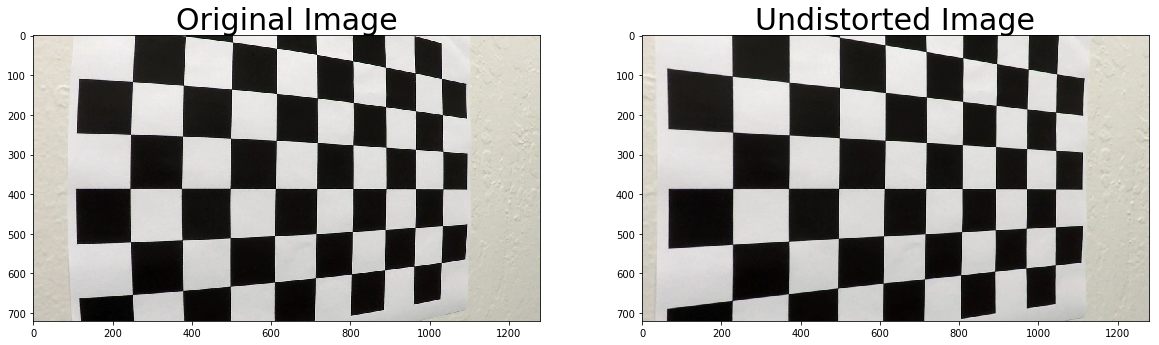

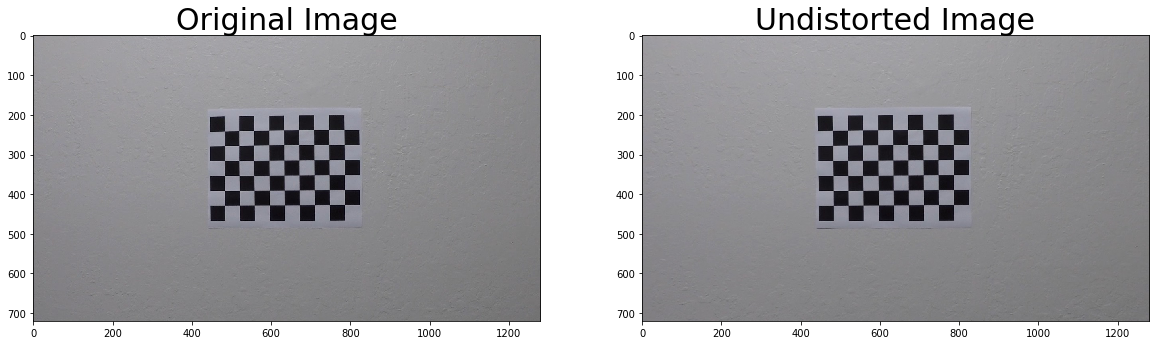

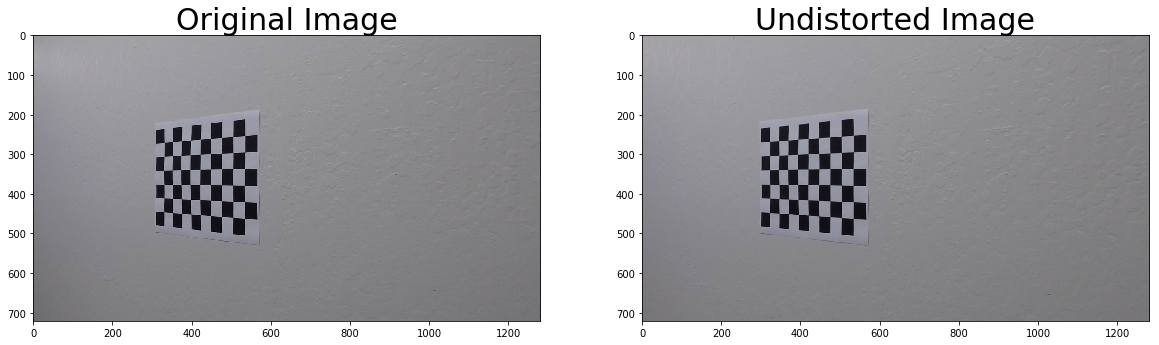

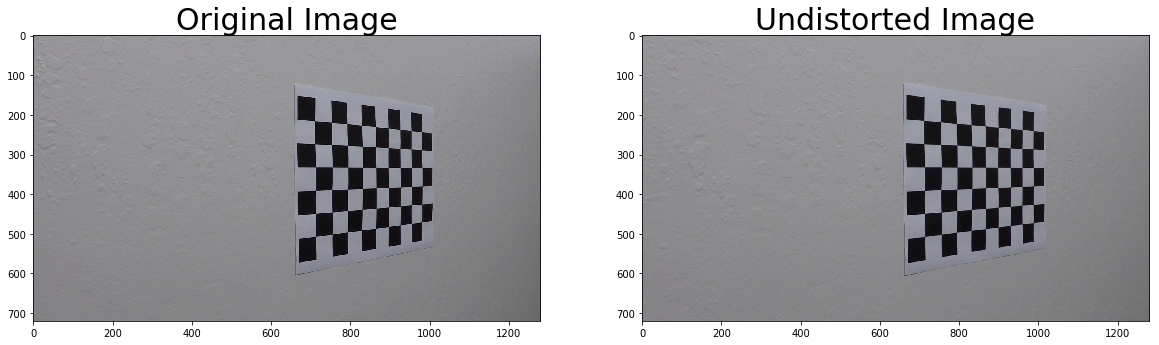

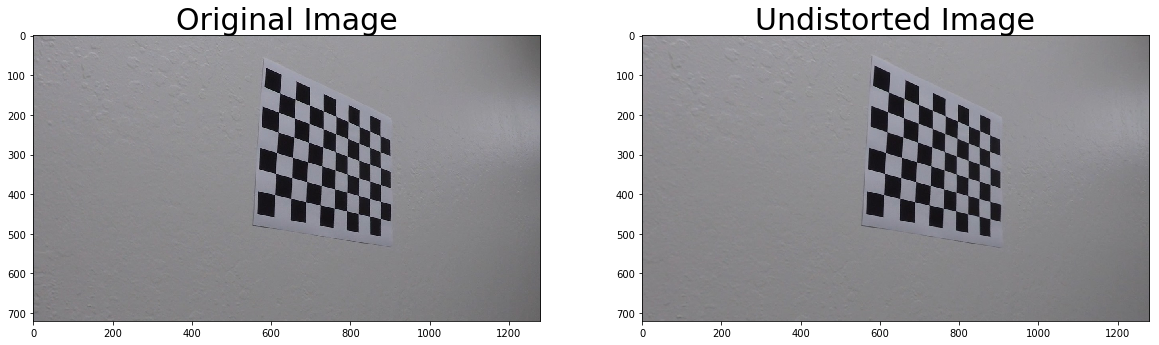

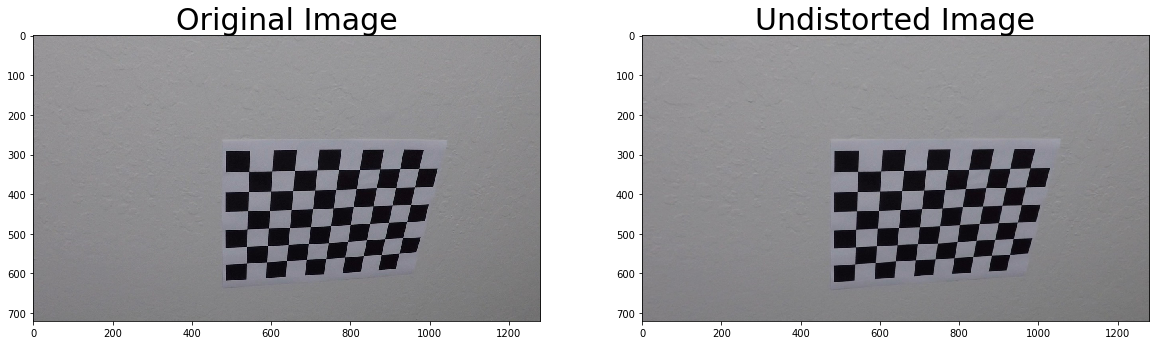

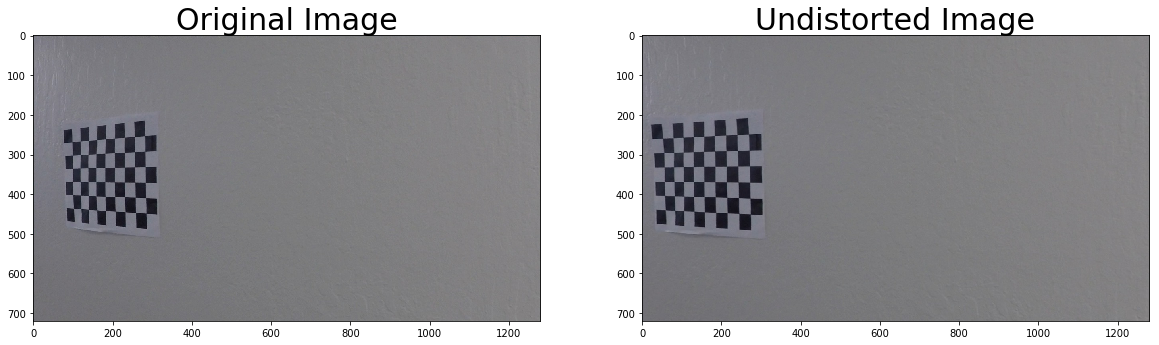

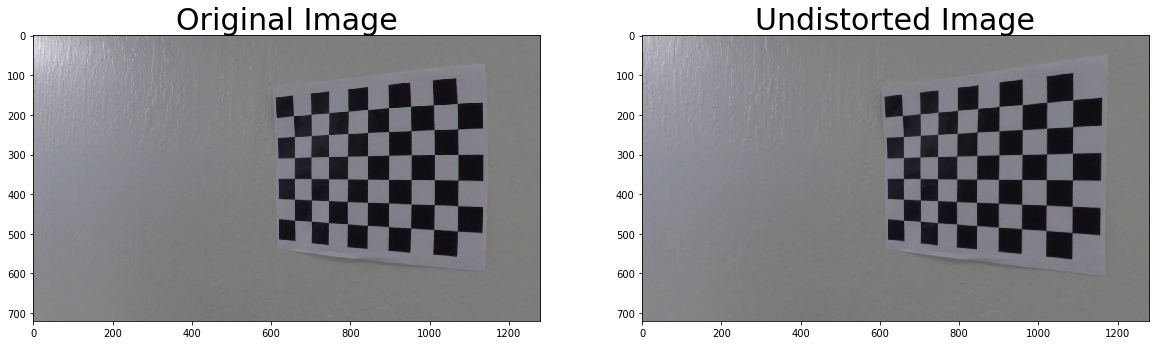

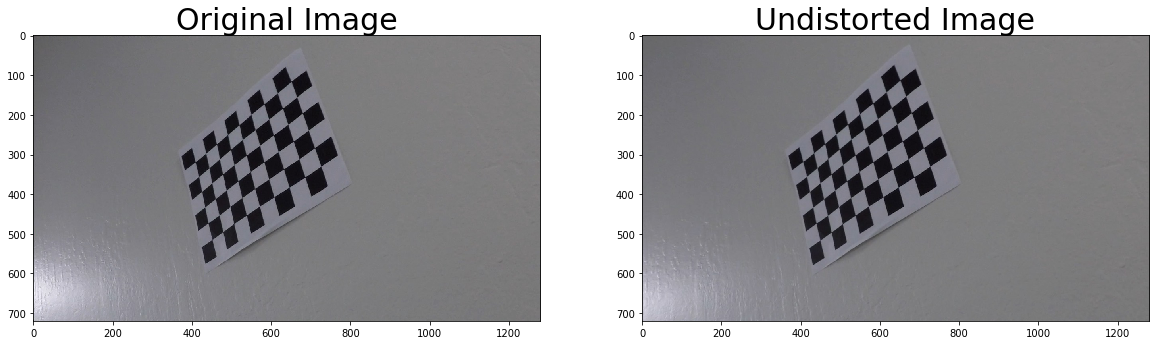

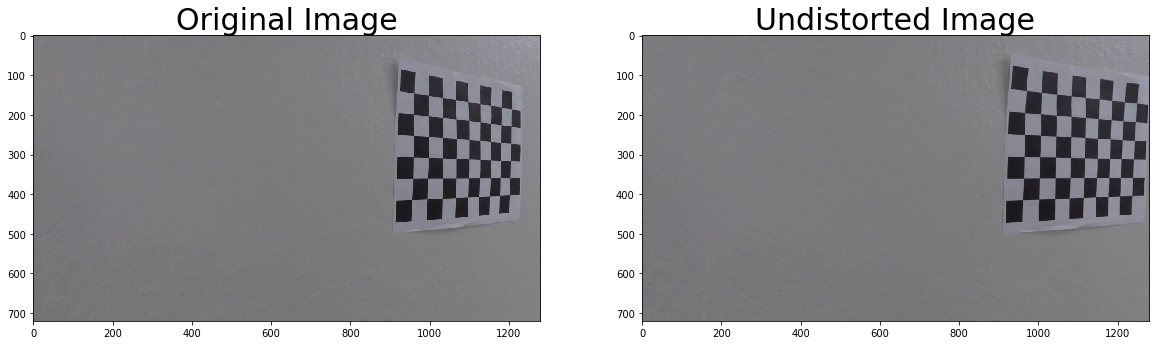

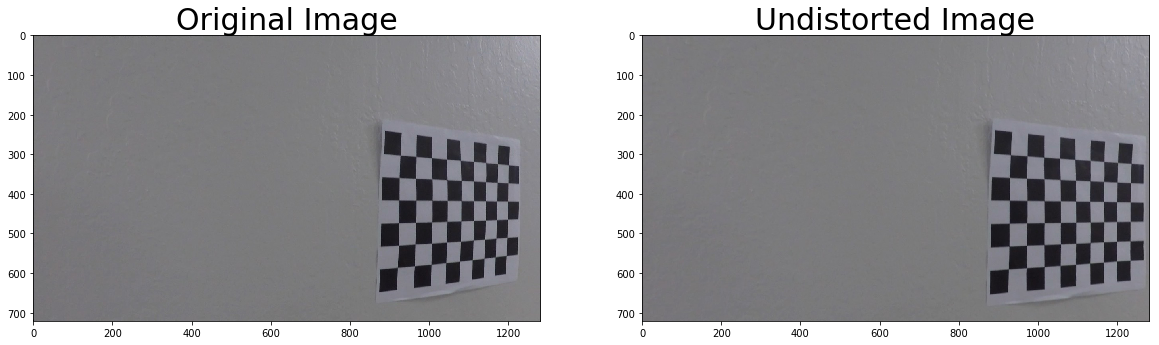

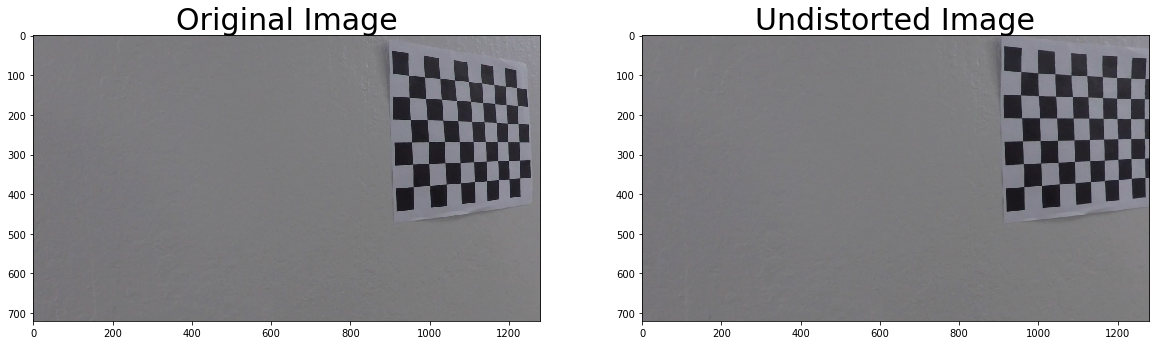

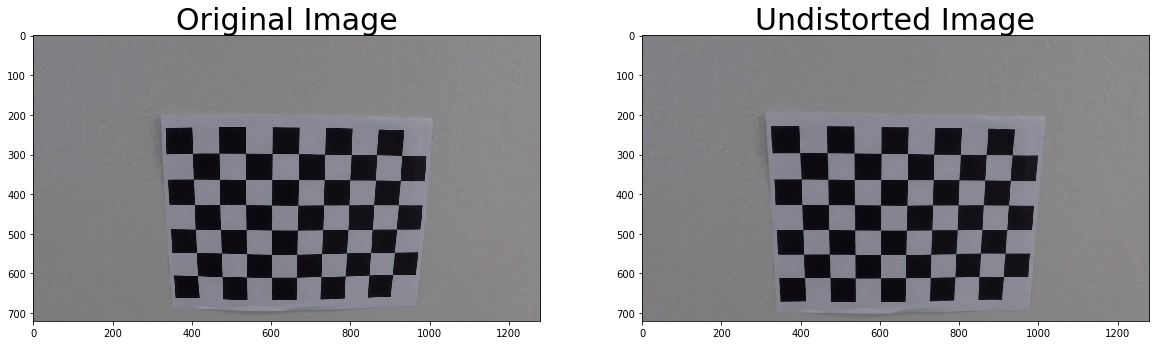

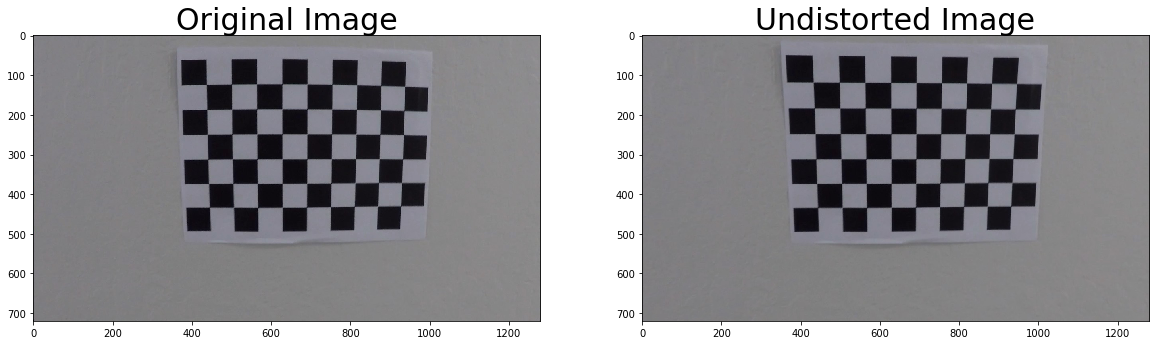

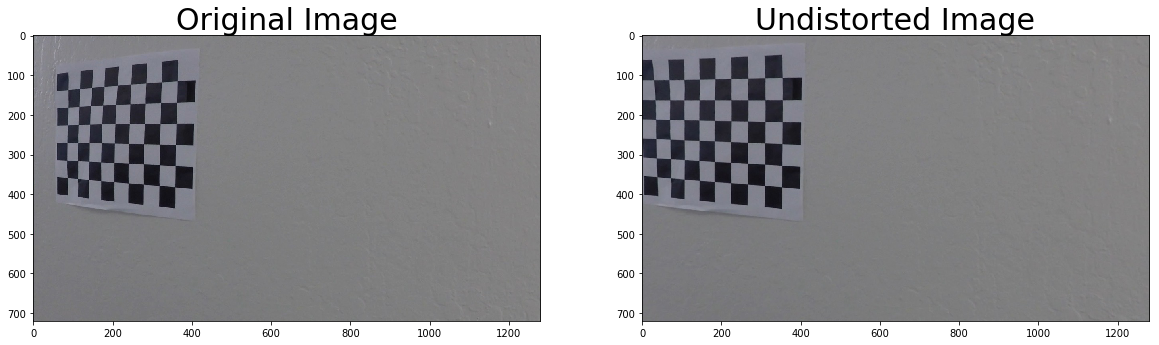

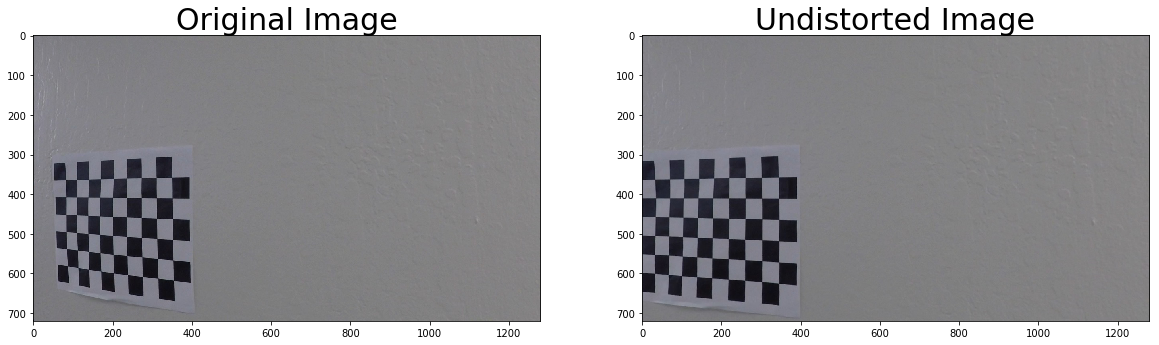

In [11]:
for i in range(20):
    load_path = 'camera_cal/calibration' + str(i+1) + '.jpg'
    raw_img = mpimg.imread(load_path)
    und_img = undistort_img(raw_img)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(raw_img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(und_img)
    ax2.set_title('Undistorted Image', fontsize=30)